In [50]:
# import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from scipy import stats
import scipy.stats as scp

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Qn.1 Load the dataset into python environment**


In [52]:
#Load the csv files into pandas dataframe
#Salesdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/.csv')
Data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic.csv')
Data




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Qn.2 Make ‘PassengerId’ as the index column**


In [53]:
df = Data.set_index('PassengerId')  # This sets the index to become the 'PassengerId' coulmn
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Qn.3 Check the basic details of the dataset**

In [54]:
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


***This will display the contents of the dataset***

In [55]:
df.shape

(891, 11)

***This gives an idea about the number of rows and columns. The dataset contains 891 rows ann 12 columns***

In [56]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

***The dataset contains a list of passengers with the following features viz.,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin and Embarked. Also, there are some missing values in the dataset.***

In [57]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***This will give a statistical summary of count, mean, standard deviation, minimum value of each column also maximum, 25%, 50% and 75% percentile for the dataset***

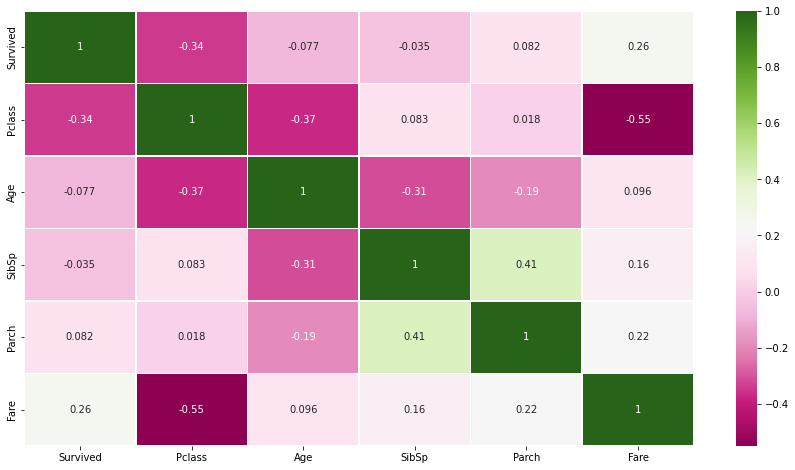

In [58]:
Corr=df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(Corr,annot=True,linewidth=0.5,cmap='PiYG')

***The heatmap infers how the fetaures in the dataset are correlated to each other.So here we can conclude that  low values preseted by the heatmap indicates less correlation between features***

**Qn.4 Fill in all the missing values present in all the columns in the dataset**

In [59]:
df.isna().sum() # This will find out the null values present in each column of the dataset

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

It is clear that null values are present in the dataset. The features Age, Cabin and Embarked show the null values.From codeno.9 (info()), we can see that  the summary of the feature Age is float data type and Cabin and Embarked are Object types.

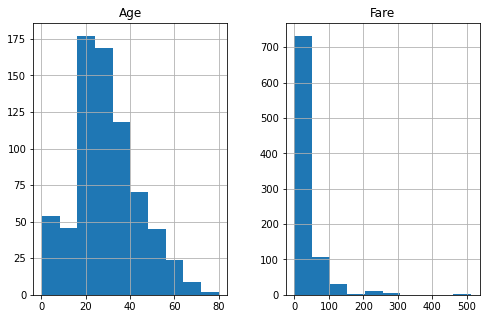

In [60]:
freqgraph = df.select_dtypes(include='float')
freqgraph.hist(figsize=(8,5))
plt.show()

We can see that all the float type features are almost right skewed and now we can fill the missing values  with the median of each of the columns

In [61]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [62]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Now the 'Age' coumn is filled with the missing values. Next to fill are object types(Cabin and Embarked). So mode function can be used to treat these missing values

In [63]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
df['Embarked'] = df['Embarked'].fillna('S') 

As per the count value for Embarked , there are 644 'S' present in the dataset so we can use mode with a value 'S' (Embarked).

In [65]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Now,we can see that the missing values are filled in the feature'Embarked'. In the case of 'Cabin' almost 77% are missing values(687 out of 891 values).So it will be better to drop that featureand also it won't have any impact on further predictions.

In [66]:
df.drop('Cabin',axis =1, inplace =True)

In [67]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

It is now clear that all the missing values have been filled.

**Qn.5 Check and handle outliers in at least 3 columns in the dataset**

Firt plot a boxplot for identifying outliers

Text(0.5, 1.0, 'Box plot of Age')

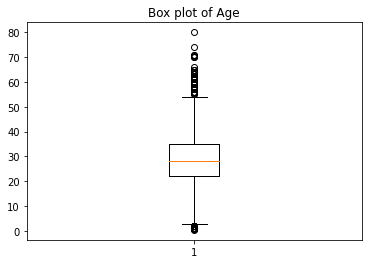

In [68]:
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

We can see outliers here and so we have to find out quartile values for the feature 'Age'

In [69]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')

In [70]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [71]:
df['Age'].median()  # Median and Q2 will be the same

28.0

In [72]:
IQR=Q3-Q1      # Calculate the interquartile range
Low_lim=Q1-1.5*IQR  # Calculte the lower limit
Up_lim=Q3+1.5*IQR   # Calculate the upper limit
print(Low_lim)
print(Up_lim)

2.5
54.5


From IQR we can find the lower limit and upper limit and we can remove values below lower limit and above upper limit.So here we can remove all the values greater than 54.5 and lesser than 2.5

In [73]:
outlier=[]
for x in df['Age']:
    if((x>Up_lim) or (x<Low_lim)):  
       outlier.append(x)

This will create an empty list outlier and checking conditions of upper limit or lower limit and append those values to outlier list.

In [74]:
outlier    # This will display the outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

Next is to find the index values of these outliers.

In [75]:
ind1=df['Age']>Up_lim
df.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [76]:
df.drop([12,16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)   # This will drop the index values which is in the outlier list

Text(0.5, 1.0, 'Box plot of Age')

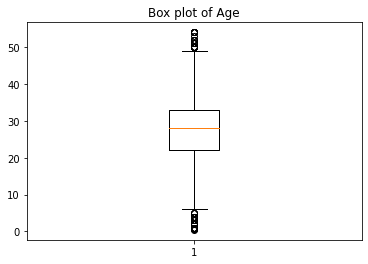

In [30]:
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

Now, we can see that the outliers are removed

Text(0.5, 1.0, 'Box plot of SibSp')

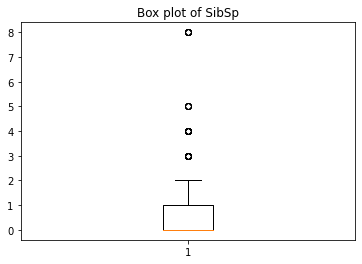

In [31]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

In [32]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')

In [33]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [27]:
IQR=Q3-Q1           # Calculate the interquartile range
Low_lim=Q1-1.5*IQR  # Calculte the lower limit
Up_lim=Q3+1.5*IQR   # Calculate the upper limit
print(Low_lim)
print(Up_lim)

-1.5
2.5


In [78]:
outlier1=[]
for x in df['SibSp']:
    if((x>Up_lim) or (x<Low_lim)):  
       outlier.append(x)

In [79]:
ind2=df['SibSp']>Up_lim
df.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [80]:
df.drop(df.loc[ind2].index , inplace = True)

Text(0.5, 1.0, 'Box plot of SibSp')

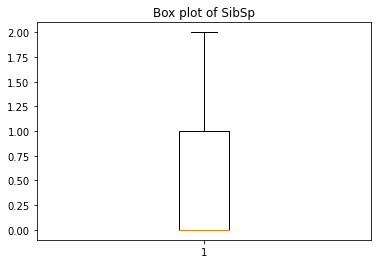

In [41]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

Now the outliers are removed here

Text(0.5, 1.0, 'Box plot of Fare')

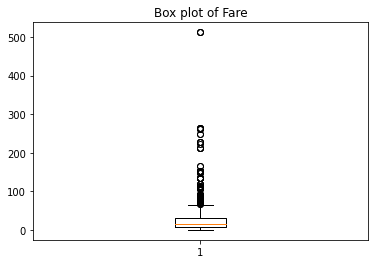

In [48]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

In [81]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [86]:
IQR=Q3-Q1           # Calculate the interquartile range
Low_lim=Q1-1.5*IQR  # Calculte the lower limit
Up_lim=Q3+1.5*IQR   # Calculate the upper limit
print(Low_lim)
print(Up_lim)

-26.0105
64.4063


In [88]:
outlier1=[]
for x in df['SibSp']:
    if((x>Up_lim) or (x<Low_lim)):  
       outlier.append(x)

In [91]:
ind1=df['Fare']>Up_lim
df.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [92]:
df.drop(df.loc[ind1].index , inplace = True)

Text(0.5, 1.0, 'Box plot of Fare')

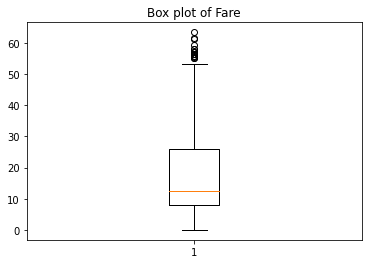

In [93]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

Here,Also the outliers are removed

**Qn.6 Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [ ]:
X.describe()

In [ ]:
X = dummy.drop('Survived', axis=1)
X.describe()

In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.describe()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Linear model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

# MSE and R Squared
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

In [103]:
from sklearn import preprocessing    # Trying some alternative methods
df1 = df.copy(deep =True)

In [104]:
df1.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S


In [105]:
df1.drop(["Name" , "Ticket"] , axis =1 , inplace = True)

In [106]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.250,S
3,1,3,female,26.0,0,0,7.925,S


In [114]:
dummies = pd.get_dummies(df1["Embarked"] , prefix ="Embarked")
data2 = df1.drop("Embarked" , axis =1 )
data2 = pd.concat([df1 , dummies] , axis =1 )

In [115]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.250,S
3,1,3,female,26.0,0,0,7.925,S


In [117]:
df1["Sex"].replace("male" ,0 , inplace = True)
df1["Sex"].replace("female" ,1 ,inplace = True)

In [118]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.250,S
3,1,3,1,26.0,0,0,7.925,S


In [129]:
dummies = pd.get_dummies(df1["Embarked"] , prefix ="Embarked")
df1 = df1.drop("Embarked" , axis =1 )
df1= pd.concat([df1 , dummies] , axis =1 )

In [130]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_1,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.250,1,0,0
3,1,3,1,26.0,0,0,7.925,1,0,0


In [131]:
#now we can do min max scaling 
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()

X = df1.drop("Survived" , axis =1)

In [132]:
y = df1["Survived"]

In [133]:
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [137]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()

X = df1.drop("Survived" , axis =1)

In [138]:
y = df1["Survived"]

In [139]:
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [140]:
y = min_max.fit_transform([y])
y = pd.DataFrame(y)

In [141]:
y = y.stack()

In [145]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y ,random_state=42, test_size=0.2)

In [146]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
my_model = model.fit(xtrain,ytrain)
prediction = my_model.predict(xtest)

In [147]:
from sklearn.metrics import mean_squared_error

print("MSe is " ,mean_squared_error(ytest, prediction))

MSe is  0.0
